In [142]:
from enum import Enum, auto
import pandas as pd
import seaborn as sns
import numpy as np

file_name = '/home/christo/dev/data/voters/SWVF_sample.txt.gz'
sample_size = 1000

class ElectionType(Enum):
    SPECIAL = auto()
    PRIMARY = auto()
    GENERAL = auto()

In [79]:
cm = lambda x: lambda y: y.startswith(x)  # find matching column names
vote = pd.read_csv(file_name, compression='gzip', encoding='ISO-8859-1')

In [80]:
elec_cols = {et.name: list(filter(cm(et.name), vote.columns)) for et in ElectionType}
print(elec_cols)

elec_cols

{'SPECIAL': ['SPECIAL-05/08/2001', 'SPECIAL-05/06/2003', 'SPECIAL-02/08/2005', 'SPECIAL-02/07/2006'], 'PRIMARY': ['PRIMARY-03/07/2000', 'PRIMARY-05/07/2002', 'PRIMARY-03/02/2004', 'PRIMARY-05/03/2005', 'PRIMARY-09/13/2005', 'PRIMARY-05/02/2006', 'PRIMARY-05/08/2007', 'PRIMARY-09/11/2007', 'PRIMARY-11/06/2007', 'PRIMARY-03/04/2008', 'PRIMARY-10/14/2008', 'PRIMARY-05/05/2009', 'PRIMARY-09/08/2009', 'PRIMARY-09/15/2009', 'PRIMARY-09/29/2009', 'PRIMARY-05/04/2010', 'PRIMARY-07/13/2010', 'PRIMARY-09/07/2010', 'PRIMARY-05/03/2011', 'PRIMARY-09/13/2011', 'PRIMARY-03/06/2012', 'PRIMARY-05/07/2013', 'PRIMARY-09/10/2013', 'PRIMARY-10/01/2013', 'PRIMARY-05/06/2014', 'PRIMARY-05/05/2015', 'PRIMARY-09/15/2015', 'PRIMARY-03/15/2016', 'PRIMARY-09/13/2016', 'PRIMARY-05/02/2017', 'PRIMARY-09/12/2017', 'PRIMARY-05/08/2018', 'PRIMARY-05/07/2019', 'PRIMARY-09/10/2019', 'PRIMARY-03/17/2020'], 'GENERAL': ['GENERAL-11/07/2000', 'GENERAL-11/06/2001', 'GENERAL-11/05/2002', 'GENERAL-11/04/2003', 'GENERAL-11/02/

{'SPECIAL': ['SPECIAL-05/08/2001',
  'SPECIAL-05/06/2003',
  'SPECIAL-02/08/2005',
  'SPECIAL-02/07/2006'],
 'PRIMARY': ['PRIMARY-03/07/2000',
  'PRIMARY-05/07/2002',
  'PRIMARY-03/02/2004',
  'PRIMARY-05/03/2005',
  'PRIMARY-09/13/2005',
  'PRIMARY-05/02/2006',
  'PRIMARY-05/08/2007',
  'PRIMARY-09/11/2007',
  'PRIMARY-11/06/2007',
  'PRIMARY-03/04/2008',
  'PRIMARY-10/14/2008',
  'PRIMARY-05/05/2009',
  'PRIMARY-09/08/2009',
  'PRIMARY-09/15/2009',
  'PRIMARY-09/29/2009',
  'PRIMARY-05/04/2010',
  'PRIMARY-07/13/2010',
  'PRIMARY-09/07/2010',
  'PRIMARY-05/03/2011',
  'PRIMARY-09/13/2011',
  'PRIMARY-03/06/2012',
  'PRIMARY-05/07/2013',
  'PRIMARY-09/10/2013',
  'PRIMARY-10/01/2013',
  'PRIMARY-05/06/2014',
  'PRIMARY-05/05/2015',
  'PRIMARY-09/15/2015',
  'PRIMARY-03/15/2016',
  'PRIMARY-09/13/2016',
  'PRIMARY-05/02/2017',
  'PRIMARY-09/12/2017',
  'PRIMARY-05/08/2018',
  'PRIMARY-05/07/2019',
  'PRIMARY-09/10/2019',
  'PRIMARY-03/17/2020'],
 'GENERAL': ['GENERAL-11/07/2000',
  'GE

In [81]:
for c in elec_cols['GENERAL']:
    print(f"{c}: {vote[c].notna().sum()}")

GENERAL-11/07/2000: 2816
GENERAL-11/06/2001: 1560
GENERAL-11/05/2002: 2079
GENERAL-11/04/2003: 1553
GENERAL-11/02/2004: 3914
GENERAL-11/08/2005: 2168
GENERAL-11/07/2006: 3044
GENERAL-11/06/2007: 1607
GENERAL-12/11/2007: 84
GENERAL-11/04/2008: 4461
GENERAL-11/18/2008: 0
GENERAL-11/03/2009: 2613
GENERAL-11/02/2010: 3192
GENERAL-11/08/2011: 3121
GENERAL-11/06/2012: 4852
GENERAL-11/05/2013: 1867
GENERAL-11/04/2014: 2823
GENERAL-11/03/2015: 3017
GENERAL-06/07/2016: 28
GENERAL-11/08/2016: 5273
GENERAL-11/07/2017: 2349
GENERAL-08/07/2018: 260
GENERAL-11/06/2018: 4399
GENERAL-11/05/2019: 2066
GENERAL-11/03/2020: 5999


In [58]:
vote[elec_cols['GENERAL'][-1]].unique()

array([nan, 'X'], dtype=object)

In [64]:
vote_cluster = vote.copy()

elec_cols['GENERAL'][:-2]

ValueError: could not convert string to float: 'X'

In [187]:
votec = vote.copy()
votec

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,...,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,GENERAL-11/03/2020
0,OH0026000812,18,2979274,GREEN,NICOLE,M,NaN,1974-11-27,2020-10-05,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OH0021926223,18,2549153,HALL,ANTHONY,NaN,NaN,1959-12-25,2012-09-10,ACTIVE,...,NaN,X,NaN,NaN,X,NaN,NaN,NaN,NaN,X
2,OH0025830622,18,2957091,RAY,KATHLEEN,KERN,NaN,1955-09-19,2020-09-11,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
3,OH0024069097,18,2772424,COOK,DYLAN,A,NaN,1996-11-19,2020-09-24,CONFIRMATION,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,D,X
4,OH0014648988,18,411390,HILTAYCHUCK,JOHN,C,NaN,1952-04-07,2013-08-08,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,OH0019462088,67,9500376,SIMMS,JESSICA,RENEE,NaN,1977-01-21,2008-01-25,ACTIVE,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,D,NaN
7982,OH0012160018,84,7100289,MARSHALL,SHELBY,J,NaN,1936-06-20,1971-06-05,ACTIVE,...,NaN,X,D,NaN,X,NaN,NaN,X,D,X
7983,OH0024485703,84,10234371,MCLAIN,DEREK,ANDREW,NaN,1978-07-30,2018-01-17,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
7984,OH0024773528,78,434796,CANNON,JOHN,E,NaN,1948-10-21,2018-09-08,CONFIRMATION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10)
fitted = cluster.fit(votec[elec_cols['GENERAL'][:-2]], votec[elec_cols['GENERAL'][-1]])
fitted

ValueError: could not convert string to float: 'X'

In [188]:
c = elec_cols['GENERAL'][-1]
votec[c]

0       NaN
1         X
2         X
3         X
4         X
       ... 
7981    NaN
7982      X
7983      X
7984    NaN
7985      X
Name: GENERAL-11/03/2020, Length: 7986, dtype: object

In [189]:
ec = [c for n in elec_cols for c in elec_cols[n]]
ec

['SPECIAL-05/08/2001',
 'SPECIAL-05/06/2003',
 'SPECIAL-02/08/2005',
 'SPECIAL-02/07/2006',
 'PRIMARY-03/07/2000',
 'PRIMARY-05/07/2002',
 'PRIMARY-03/02/2004',
 'PRIMARY-05/03/2005',
 'PRIMARY-09/13/2005',
 'PRIMARY-05/02/2006',
 'PRIMARY-05/08/2007',
 'PRIMARY-09/11/2007',
 'PRIMARY-11/06/2007',
 'PRIMARY-03/04/2008',
 'PRIMARY-10/14/2008',
 'PRIMARY-05/05/2009',
 'PRIMARY-09/08/2009',
 'PRIMARY-09/15/2009',
 'PRIMARY-09/29/2009',
 'PRIMARY-05/04/2010',
 'PRIMARY-07/13/2010',
 'PRIMARY-09/07/2010',
 'PRIMARY-05/03/2011',
 'PRIMARY-09/13/2011',
 'PRIMARY-03/06/2012',
 'PRIMARY-05/07/2013',
 'PRIMARY-09/10/2013',
 'PRIMARY-10/01/2013',
 'PRIMARY-05/06/2014',
 'PRIMARY-05/05/2015',
 'PRIMARY-09/15/2015',
 'PRIMARY-03/15/2016',
 'PRIMARY-09/13/2016',
 'PRIMARY-05/02/2017',
 'PRIMARY-09/12/2017',
 'PRIMARY-05/08/2018',
 'PRIMARY-05/07/2019',
 'PRIMARY-09/10/2019',
 'PRIMARY-03/17/2020',
 'GENERAL-11/07/2000',
 'GENERAL-11/06/2001',
 'GENERAL-11/05/2002',
 'GENERAL-11/04/2003',
 'GENERAL-1

In [190]:
votec['TIMES_VOTED'] = votec[ec].notna().sum(axis=1)
votec.columns.to_list()

['SOS_VOTERID',
 'COUNTY_NUMBER',
 'COUNTY_ID',
 'LAST_NAME',
 'FIRST_NAME',
 'MIDDLE_NAME',
 'SUFFIX',
 'DATE_OF_BIRTH',
 'REGISTRATION_DATE',
 'VOTER_STATUS',
 'PARTY_AFFILIATION',
 'RESIDENTIAL_ADDRESS1',
 'RESIDENTIAL_SECONDARY_ADDR',
 'RESIDENTIAL_CITY',
 'RESIDENTIAL_STATE',
 'RESIDENTIAL_ZIP',
 'RESIDENTIAL_ZIP_PLUS4',
 'RESIDENTIAL_COUNTRY',
 'RESIDENTIAL_POSTALCODE',
 'MAILING_ADDRESS1',
 'MAILING_SECONDARY_ADDRESS',
 'MAILING_CITY',
 'MAILING_STATE',
 'MAILING_ZIP',
 'MAILING_ZIP_PLUS4',
 'MAILING_COUNTRY',
 'MAILING_POSTAL_CODE',
 'CAREER_CENTER',
 'CITY',
 'CITY_SCHOOL_DISTRICT',
 'COUNTY_COURT_DISTRICT',
 'CONGRESSIONAL_DISTRICT',
 'COURT_OF_APPEALS',
 'EDU_SERVICE_CENTER_DISTRICT',
 'EXEMPTED_VILL_SCHOOL_DISTRICT',
 'LIBRARY',
 'LOCAL_SCHOOL_DISTRICT',
 'MUNICIPAL_COURT_DISTRICT',
 'PRECINCT_NAME',
 'PRECINCT_CODE',
 'STATE_BOARD_OF_EDUCATION',
 'STATE_REPRESENTATIVE_DISTRICT',
 'STATE_SENATE_DISTRICT',
 'TOWNSHIP',
 'VILLAGE',
 'WARD',
 'PRIMARY-03/07/2000',
 'GENERAL-11

In [191]:
mean_votes= votec[['COUNTY_ID', 'TIMES_VOTED']].groupby('COUNTY_ID').mean()
mean_votes

,TIMES_VOTED
COUNTY_ID,
84,28.0
85,20.0
164,27.0
403,19.0
525,28.0
...,...
990113914,6.0
990215687,4.0
990219593,26.0


In [194]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(mean_votes, x='COUNTY_ID', y='TIMES_VOTED')


/home/christo/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'TIMES_VOTED'

In [195]:
votec['DATE_OF_BIRTH'] = votec['DATE_OF_BIRTH'].astype('datetime64[ns]')
votec['DATE_OF_BIRTH'] = pd.DatetimeIndex(votec['DATE_OF_BIRTH'])
votec['CURRENT_AGE'] = 2021 - pd.DatetimeIndex(votec['DATE_OF_BIRTH']).year
pd.qcut(votec['CURRENT_AGE'], q = 10, precision=0)

0        (44.0, 51.0]
1        (57.0, 62.0]
2        (62.0, 68.0]
3        (17.0, 26.0]
4        (68.0, 75.0]
            ...      
7981     (38.0, 44.0]
7982    (75.0, 120.0]
7983     (38.0, 44.0]
7984     (68.0, 75.0]
7985     (44.0, 51.0]
Name: CURRENT_AGE, Length: 7986, dtype: category
Categories (10, interval[float64]): [(17.0, 26.0] < (26.0, 32.0] < (32.0, 38.0] < (38.0, 44.0] ... (57.0, 62.0] < (62.0, 68.0] < (68.0, 75.0] < (75.0, 120.0]]

In [201]:
# remove people over 100yo - not stat sig
votec = votec.loc[votec['CURRENT_AGE'] < 100]
len(votec)

7982

In [206]:
pd.to_datetime('11/03/2020')

Timestamp('2020-11-03 00:00:00')

In [220]:
# figure out age of each voter at each election
# ex. col GENERAL-11/03/2020
votec['DOB'] = pd.DatetimeIndex(votec['DATE_OF_BIRTH'])
def age_at(d, dob):
    return (pd.to_datetime(d.split('-')[1]) - dob) / np.timedelta64(1, 'Y')
for et, ec in elec_cols.items():
    for c in ec:
        votec[f"{c}-AGE"] = votec[['DOB']].apply(lambda x: age_at(c, x))

In [261]:
mean_ages = []
for et, ec in elec_cols.items():
    for c in ec:
        mean_ages.append(tuple(c.split('-')) + (votec.loc[votec[c].notna(), f"{c}-AGE"].mean(), votec.loc[(votec[c].notna() & votec['PARTY_AFFILIATION'].notna()), f"{c}-AGE"].mean()))
mean_ages

[('SPECIAL', '05/08/2001', 48.31930503190604, 48.5357446791615),
 ('SPECIAL', '05/06/2003', 50.04782957219755, 50.5150476484771),
 ('SPECIAL', '02/08/2005', 49.85176571481865, 51.03755959009661),
 ('SPECIAL', '02/07/2006', 50.468307307356945, 52.18432502606716),
 ('PRIMARY', '03/07/2000', 46.48219395955489, 47.20447747682539),
 ('PRIMARY', '05/07/2002', 49.42709801649764, 50.09880486297851),
 ('PRIMARY', '03/02/2004', 49.39044810157837, 50.06250288806307),
 ('PRIMARY', '05/03/2005', 50.09325141242128, 51.29630165402167),
 ('PRIMARY', '09/13/2005', 47.88480315787814, 48.583899085962784),
 ('PRIMARY', '05/02/2006', 51.73634035430893, 52.398475977792394),
 ('PRIMARY', '05/08/2007', 52.730060145809304, 53.5463982257878),
 ('PRIMARY', '09/11/2007', 51.083086677246726, 54.766353860791114),
 ('PRIMARY', '11/06/2007', 53.41023892123505, 54.68635564043067),
 ('PRIMARY', '03/04/2008', 49.34849387476123, 50.730156050057815),
 ('PRIMARY', '10/14/2008', nan, nan),
 ('PRIMARY', '05/05/2009', 53.1444

In [273]:
mean_voter_age = pd.DataFrame(mean_ages)
mean_voter_age.columns = ['election_type', 'election_date', 'mean_voter_age', 'mean_party_voter_age']
mean_voter_age['election_date'] = pd.to_datetime( mean_voter_age['election_date'], format='%m/%d/%Y')

mean_voter_age = mean_voter_age.sort_values(by=['election_date']).reset_index(drop=True)

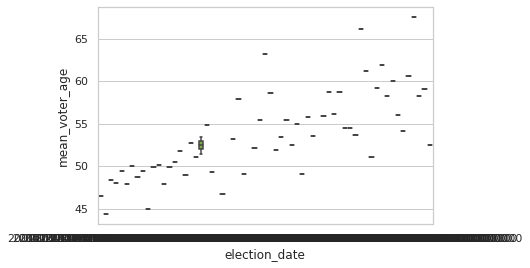

In [275]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='election_date', y='mean_voter_age', data=mean_voter_age, orient="v")
# ax.set_xticklabels(labels=mean_voter_age['election_date'], rotation=60)